### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [581]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [583]:
data = pd.read_csv('/content/coupons.csv')

In [584]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [585]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [586]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


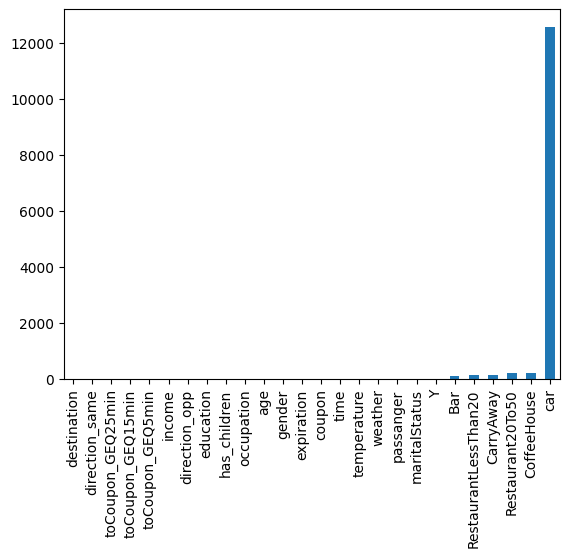

In [587]:

data.isnull().sum().sort_values().plot(kind = 'bar')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...
---
The "car" column is dropped due to having only 109 non-null values, which is insignificant compared to the 12,684 total entries.

In [588]:
data1= data.drop('car', axis=1)

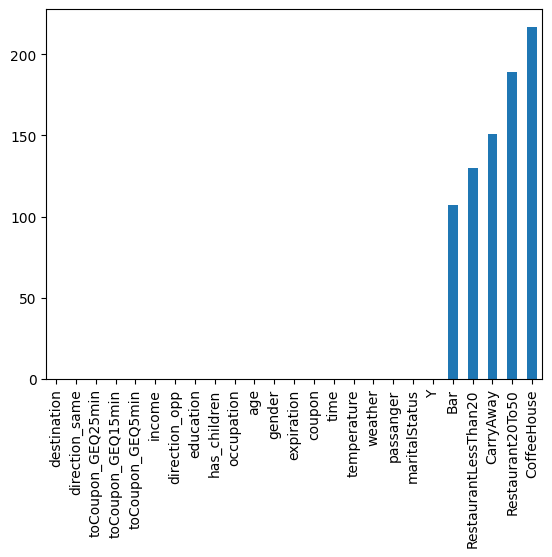

In [589]:
data1.isnull().sum().sort_values().plot(kind = 'bar')
plt.show()

In [590]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


4. What proportion of the total observations chose to accept the coupon?
---
56.84% which is 7210 observations chose to accept the coupon out of 12684.

In [591]:
data1['Y'].value_counts(normalize=True) * 100

,proportion
Y,
1,56.843267
0,43.156733


In [592]:
data1['Y'].value_counts()

,count
Y,
1,7210
0,5474


5. Use a bar plot to visualize the `coupon` column.

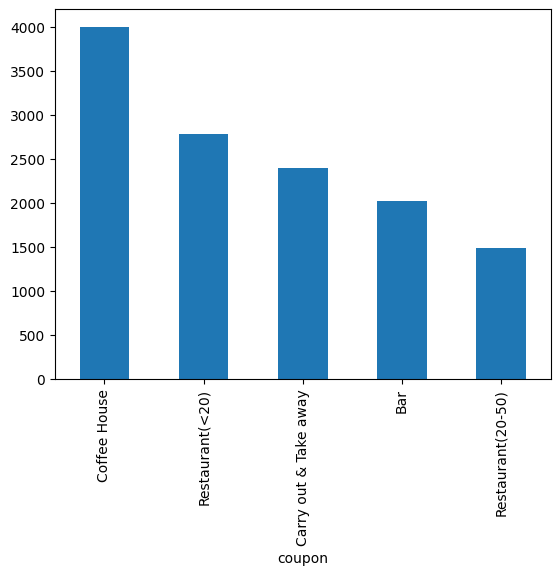

In [593]:
data1['coupon'].value_counts().plot(kind = 'bar')
plt.show()

6. Use a histogram to visualize the temperature column.

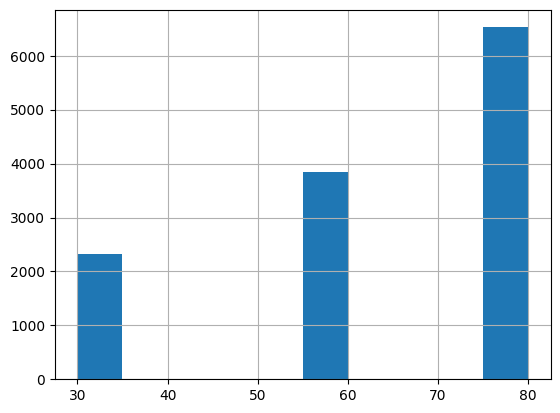

In [594]:
data1['temperature'].hist()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [595]:
data2= data1[data1['coupon'] == 'Bar']
data2.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [596]:
len(data2)

2017

In [597]:
data2['Y'].value_counts(normalize=True) * 100

,proportion
Y,
0,58.998513
1,41.001487


Result-2: 58.99% of bar coupons were accepted out of 2,017 drivers who received them.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

> Add blockquote




In [598]:
data2['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

Assumption: The values in the "Bar" column are approximated for analysis, with blank and "never" = 0, "less1" = 1, "1~3" = 3, "4~8" = 8, and "gt8" = 9.

In [599]:
data2['Bar'] = data2['Bar'].replace({' ': 0, 'never': 0, 'less1': 1, '1~3': 3, '4~8': 8, 'gt8': 9})
data2['Bar'].head()

<ipython-input-599-2474d349ef00>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['Bar'] = data2['Bar'].replace({' ': 0, 'never': 0, 'less1': 1, '1~3': 3, '4~8': 8, 'gt8': 9})
<ipython-input-599-2474d349ef00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Bar'] = data2['Bar'].replace({' ': 0, 'never': 0, 'less1': 1, '1~3': 3, '4~8': 8, 'gt8': 9})


,Bar
9,0.0
13,0.0
17,0.0
24,0.0
35,0.0


In [600]:
data2['Bar'].value_counts()

,count
Bar,
0.0,830
1.0,570
3.0,397
8.0,150
9.0,49


In [601]:
countLessThan3=len(data2[data2['Bar'] <= 3])
countMoreThan3=len(data2[data2['Bar'] >3])
countLessThan3, countMoreThan3


(1797, 199)

In [602]:
data2[data2['Bar'] <= 3]['Y'].value_counts(normalize=True) * 100

,proportion
Y,
0,62.93823
1,37.06177


In [603]:
data2[data2['Bar'] > 3]['Y'].value_counts(normalize=True) * 100

,proportion
Y,
1,76.884422
0,23.115578


Result-3: The acceptance rate for drivers who go to the bar 3 times or fewer is 62.9%, while for those who go more than 3 times, it is 76.88%, indicating a higher acceptance rate among frequent bar-goers.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [604]:
data2['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

Assumption: The values '50plus' and 'below21' in the "age" column are approximated as 51 and 20, respectively, to facilitate numerical analysis.

In [605]:
data2['age'] = data2['age'].replace({'50plus': 51, 'below21': 20})
data2['age'].head()

<ipython-input-605-1739119f5ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['age'] = data2['age'].replace({'50plus': 51, 'below21': 20})


,age
9,21
13,21
17,21
24,21
35,21


In [606]:
data2['age'] = data2['age'].astype(int)


<ipython-input-606-a71f9f7b8b0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['age'] = data2['age'].astype(int)


In [607]:
data2['age'].value_counts()

,count
age,
21,417
26,395
31,339
51,283
36,209
41,178
46,109
20,87


In [608]:
data2[(data2['Bar'] > 1) & (data2['age']>25)]['Y'].value_counts(normalize=True) * 100

,proportion
Y,
1,69.52381
0,30.47619


In [609]:
pd.crosstab(data2['Bar'], data2['age'])

age,20,21,26,31,36,41,46,51
Bar,,,,,,,,
0.0,65,142,140,124,87,51,61,160
1.0,12,108,83,114,79,88,32,54
3.0,6,107,96,71,28,28,9,52
8.0,0,44,55,16,12,4,7,12
9.0,4,15,18,9,0,0,0,3


Result-4: The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 69.52%. This indicates a higher acceptance rate compared to other groups, suggesting that this demographic is more likely to accept bar coupons.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [610]:
data2['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [611]:
data2['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [612]:
data2[(data2['Bar'] > 1) & (data2['passanger']!="Kid(s)") &(data2['occupation'] != 'Farming Fishing & Forestry')]['Y'].value_counts()

,count
Y,
1,393
0,158


In [613]:
data2[(data2['Bar'] > 1) & (data2['passanger']!="Kid(s)") &(data2['occupation'] != 'Farming Fishing & Forestry')]['Y'].value_counts(normalize=True)*100

,proportion
Y,
1,71.324864
0,28.675136


Result-5: The acceptance rate for drivers who go to bars more than once a month, have passengers that are not kids, and have occupations other than farming, fishing, or forestry is approximately 71.3%, with 393 accepted coupons and 158 rejected.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [614]:
data2['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [615]:
data2['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [616]:
data2[((data2['Bar'] > 1) & (data2['passanger']!="Kid(s)") &(data2['occupation'] != 'Farming Fishing & Forestry'))|((data2['Bar'] > 1) & (data2['age']<30))|((data2['RestaurantLessThan20']=="4~8") | (data2['RestaurantLessThan20']=="gt8'") &(data2['income']=="$37500 - $49999"))]['Y'].value_counts()

,count
Y,
1,486
0,424


In [617]:
cond1 = (data2['Bar'] > 1) & (data2['passanger'] != "Kid(s)") & (data2['occupation'] != 'Farming Fishing & Forestry')

cond2 = (data2['Bar'] > 1) & (data2['age'] < 30)

cond3 = ((data2['RestaurantLessThan20']=="4~8") | (data2['RestaurantLessThan20']=="gt8'") &(data2['income']=="$37500 - $49999"))

combined_cond = cond1 | cond2 | cond3

result = data2[combined_cond]['Y'].value_counts()

print(result)

Y
1    486
0    424
Name: count, dtype: int64


Result-6: The acceptance rate for the selected group is 53.4% with 486 drivers accepting the coupons and 424 drivers rejecting them.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Result-7: The data indicates that younger, more frequent bar-goers, particularly those who do not have child passengers are more likely to accept coupons. Occupational status appears to have minimal impact on drivers' willingness to accept bar coupons compared to factors like frequency of bar visits, age, and income.

In [618]:
data1['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [619]:
counts = data1.groupby(['passanger', 'coupon'])['Y'].value_counts().unstack(fill_value=0)
print(counts)

Y                                   0     1
passanger coupon                           
Alone     Bar                     711   489
          Carry out & Take away   383  1022
          Coffee House           1268   988
          Restaurant(20-50)       583   426
          Restaurant(<20)         519   916
Friend(s) Bar                     149   188
          Carry out & Take away   179   560
          Coffee House            495   733
          Restaurant(20-50)        90    78
          Restaurant(<20)         164   662
Kid(s)    Bar                     163    43
          Carry out & Take away    45   107
          Coffee House            107   100
          Restaurant(20-50)       109    65
          Restaurant(<20)          74   193
Partner   Bar                     167   107
          Carry out & Take away    26    71
          Coffee House            131   174
          Restaurant(20-50)        52    89
          Restaurant(<20)          59   199


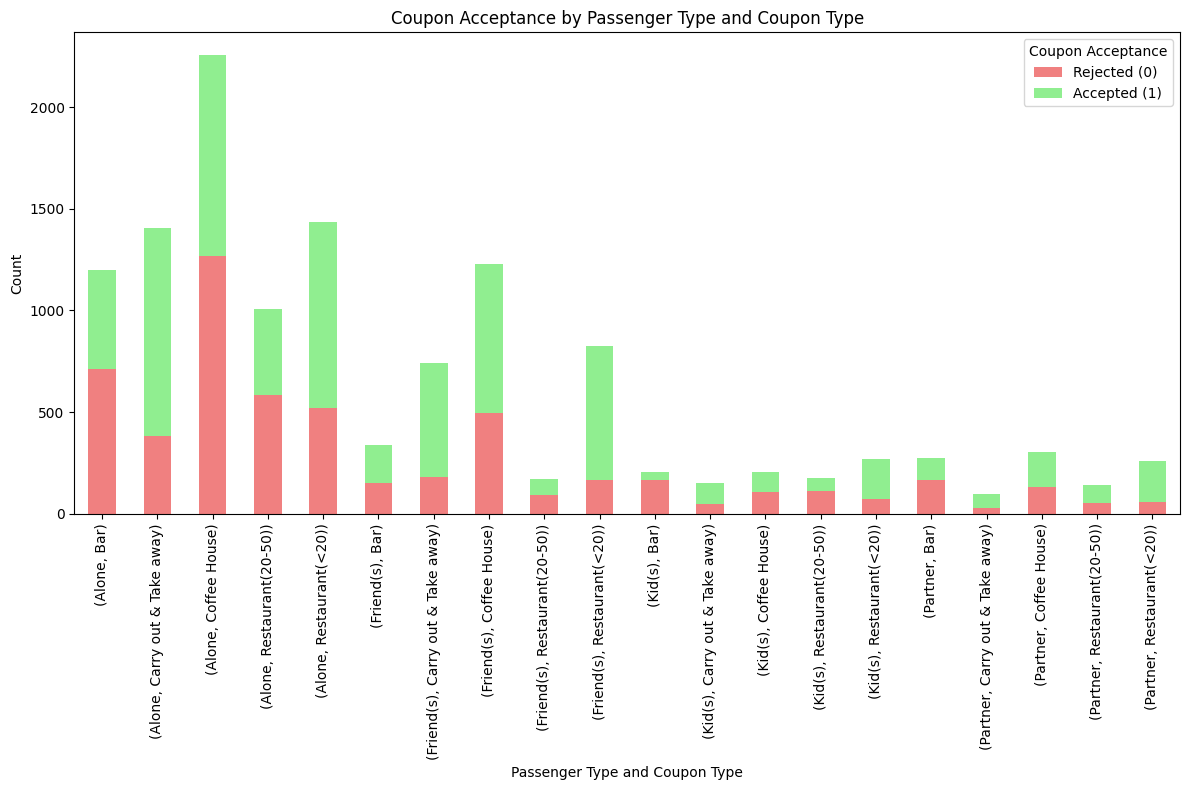

In [620]:

ax = counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightcoral', 'lightgreen'])
plt.title('Coupon Acceptance by Passenger Type and Coupon Type')
plt.xlabel('Passenger Type and Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Coupon Acceptance', labels=['Rejected (0)', 'Accepted (1)'])
plt.tight_layout()


plt.show()

Conclusion -1: People dining alone tend to accept more coupons, especially at coffee houses and bars, showing they value savings when eating out. In contrast, when dining with friends or kids, coupon acceptance drops significantly, indicating that social settings may influence how much they prioritize discounts.

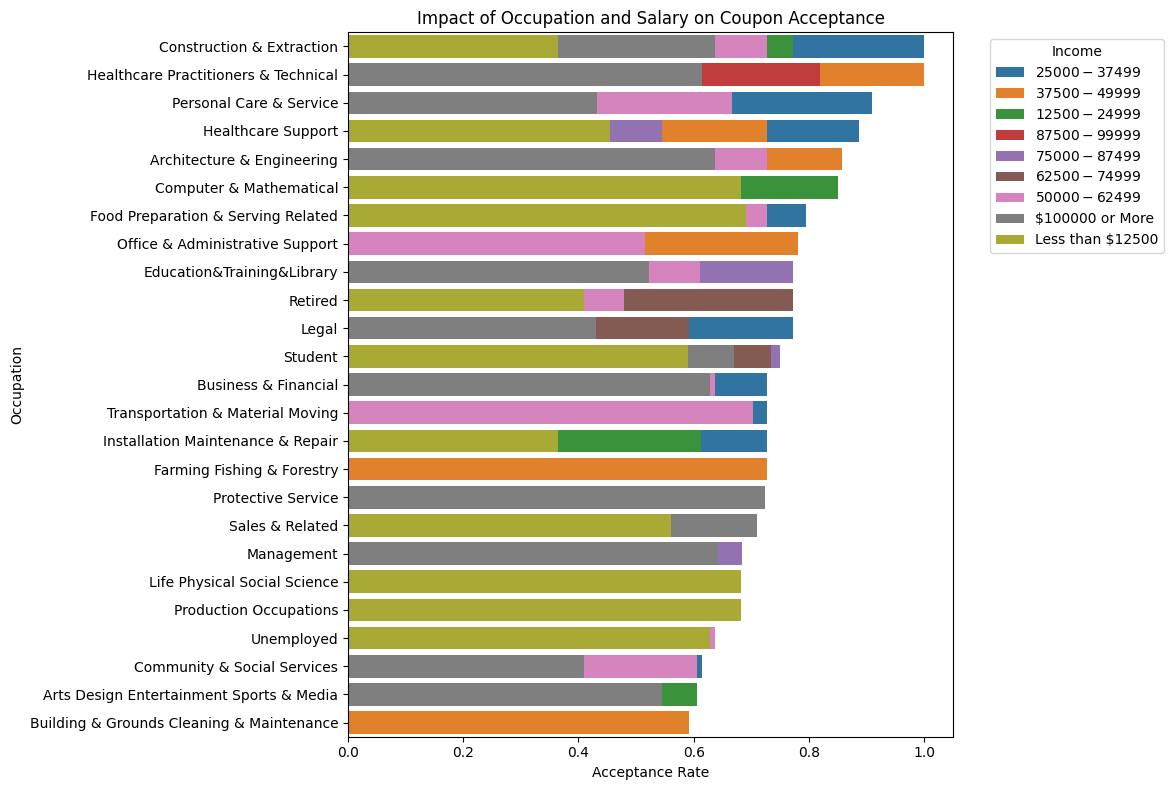

In [621]:
occupation_income_acceptance = data.groupby(['occupation', 'income'])['Y'].mean().reset_index()
occupation_income_acceptance_sorted = occupation_income_acceptance.sort_values(by='Y', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Y', y='occupation', hue='income', data=occupation_income_acceptance_sorted, dodge=False)
plt.title('Impact of Occupation and Salary on Coupon Acceptance')
plt.xlabel('Acceptance Rate')
plt.ylabel('Occupation')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Conclusion-2: Occupations like Construction and Personal Care tend to show higher coupon acceptance rates, likely due to job flexibility. Middle-income earners, such as those earning $37,500 - $49,999, tend to accept coupons more than higher earners. Higher-income groups may be less influenced by discounts, showing lower acceptance rates.

In [622]:
time_Weather_impact = data2.groupby(['time', 'weather'])['Y'].value_counts().unstack(fill_value=0)
print(counts)

Y                                   0     1
passanger coupon                           
Alone     Bar                     711   489
          Carry out & Take away   383  1022
          Coffee House           1268   988
          Restaurant(20-50)       583   426
          Restaurant(<20)         519   916
Friend(s) Bar                     149   188
          Carry out & Take away   179   560
          Coffee House            495   733
          Restaurant(20-50)        90    78
          Restaurant(<20)         164   662
Kid(s)    Bar                     163    43
          Carry out & Take away    45   107
          Coffee House            107   100
          Restaurant(20-50)       109    65
          Restaurant(<20)          74   193
Partner   Bar                     167   107
          Carry out & Take away    26    71
          Coffee House            131   174
          Restaurant(20-50)        52    89
          Restaurant(<20)          59   199


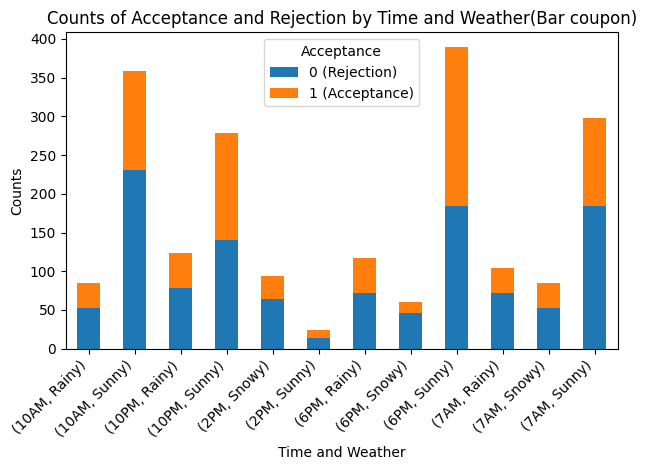

In [623]:
time_Weather_impact.plot(kind='bar', stacked=True)

plt.title('Counts of Acceptance and Rejection by Time and Weather(Bar coupon)')
plt.xlabel('Time and Weather')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Acceptance', labels=['0 (Rejection)', '1 (Acceptance)'])
plt.tight_layout()
plt.show()

Conclusion-3:Acceptance rates peak during Sunny weather at 6PM with 205 acceptances, while Rainy and Snowy conditions yield lower rates. Additionally, Sunny weather at 10AM shows a notable 128 acceptances, underscoring the influence of weather on acceptance behavior.